In [74]:
import glob
import os
import csv
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from analysisFunctions import getFiloMetrics

In [75]:
""" 
Make style adjustments for plots
"""

sns.set(style="ticks", context="talk", font_scale=2)
plt.style.use("dark_background")
plt.figure(figsize=(500,500))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 20})

<Figure size 36000x36000 with 0 Axes>

In [76]:
"""
Get latest file with filopodia lengths over time
"""
list_of_files = glob.glob('../filoLengthFiles/*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)

In [77]:
"""
Store file name and content
"""
fileName = latest_file.split('/')[2].replace(".txt", "")
f = open(latest_file, "r")
content = f.read()
f.close()

In [78]:
print(fileName)

filo_lengths_filvary_2.000000_epsilon_0.900000_VconcST0.040000_GRADIENT2_FILTIPMAX15.000000_tokenStrength1.000000_FILSPACING2_actinMax512.000000_randFilExtend-1.000000_randFilRetract-1.000000_run_1_


In [79]:
"""
CONSTANTS
"""
TIME_STEP = 15
MIN_TOTAL_EXTENDED_LENGTH = 1 # Note: I look for at least this length extended because the model tends to produce some 0.04xx total length extended which wouldnt actually be recorded in real life as it's very small to the human eye

In [80]:
"""
Get lengths recorded for each filopodium
"""
lengthsPerFilo = {}
# Get list of lengths for each filo
lines = content.split("\n")
for line in lines:
    if line != '': 
        elements = line.split(",")
        filo = elements[0]
        length = float(elements[1])
        if filo not in lengthsPerFilo: 
            lengthsPerFilo[filo] = []
        lengthsPerFilo[filo].append(length) 

# Quit this script if file is empty
if len(lengthsPerFilo) == 0:
    exit()

In [81]:
print(list(lengthsPerFilo.values())[0])
# for lengths in list(lengthsPerFilo.values())[0]:
#     print(len(lengths))

[2.29751, 2.29751, 2.29751, 2.29751, 2.29751, 2.29751, 2.29751, 2.29751, 2.29751, 2.29751, 2.29751, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 2.59863, 1.83928, 0.0]


[rcParams](https://stackoverflow.com/a/41717533)

In [82]:
plt.rcParams["figure.figsize"] = (20,10)

with help from [this](https://stackoverflow.com/a/52067407)

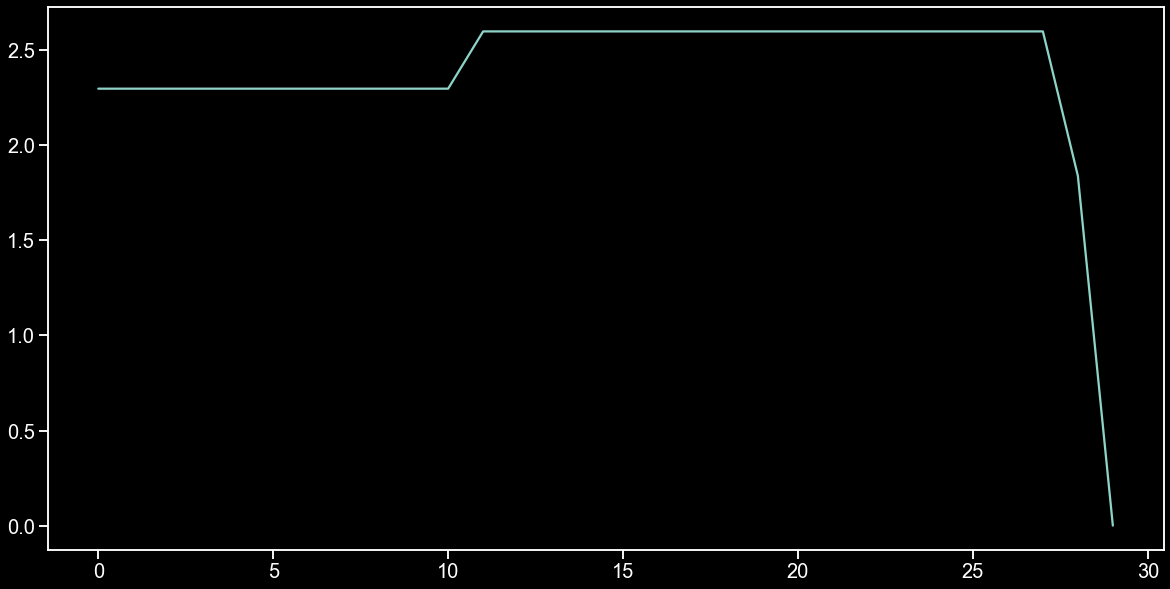

In [83]:
# for lengths in list(lengthsPerFilo.values())[0]:
#     plt.plot(lengths)
plt.plot(list(lengthsPerFilo.values())[0])

In [84]:
"""
Get lists for each metric
"""
metrics = getFiloMetrics(list(lengthsPerFilo.values()), TIME_STEP)

maxLenArr = metrics["maxLen"]
avgExtTimeArr = metrics["averageExtendingTime"]
avgRetTimeArr = metrics["averageRetractingTime"]
timeAtMaxArr = metrics["timeAtMax"]
extArr = metrics["timePerExtension"]
retArr = metrics["timePerRetraction"]


In [85]:
print(maxLenArr[0])
print(avgExtTimeArr[0])
print(avgRetTimeArr[0])
print(timeAtMaxArr[0])

2.59863
69.2672677526235
11.544544625437249
240


In [86]:
"""
Retrive invivo distributions for each metric
"""
maxLensIV = []
avgExtIV = []
avgRetIV = []
timeAtMaxIV = []
extTimesIV = []
retTimesIV = []

with open('invivo/maxLensIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            maxLensIV.append(value)
with open('invivo/avgExtIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            avgExtIV.append(value)
with open('invivo/avgRetIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            avgRetIV.append(value)
with open('invivo/timeAtMaxIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            timeAtMaxIV.append(value)
with open('invivo/extTimesIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            extTimesIV.append(value)
with open('invivo/retTimesIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line: 
            retTimesIV.append(value)


In [87]:
"""
Get KS statistic for extension and retraction times
"""
ksMaxLen = stats.ks_2samp(maxLenArr, maxLensIV)
ksAvgExt = stats.ks_2samp(avgExtTimeArr, avgExtIV)
ksAvgRet = stats.ks_2samp(avgRetTimeArr, avgRetIV)
ksTimeAtMax = stats.ks_2samp(timeAtMaxArr, timeAtMaxIV)
ksExt = stats.ks_2samp(extArr, extTimesIV)
ksRet = stats.ks_2samp(retArr, retTimesIV)

In [88]:
print(ksMaxLen)
print(ksAvgExt)
print(ksAvgRet)
print(ksTimeAtMax)
print(ksExt)
print(ksRet)

KstestResult(statistic=0.6075725163914898, pvalue=7.77362494440556e-23)
KstestResult(statistic=0.4341275352439286, pvalue=2.5919042479045123e-11)
KstestResult(statistic=0.7573813635989801, pvalue=4.3209669520679133e-38)
KstestResult(statistic=0.6907849100901766, pvalue=1.6625751741596557e-30)
KstestResult(statistic=0.6282410975536343, pvalue=1.3826890993796571e-24)
KstestResult(statistic=0.7357928410756785, pvalue=1.8488182308530305e-35)


# Display distribution curves

Text(0.5, 0, 'Max lengths reached (micron)')

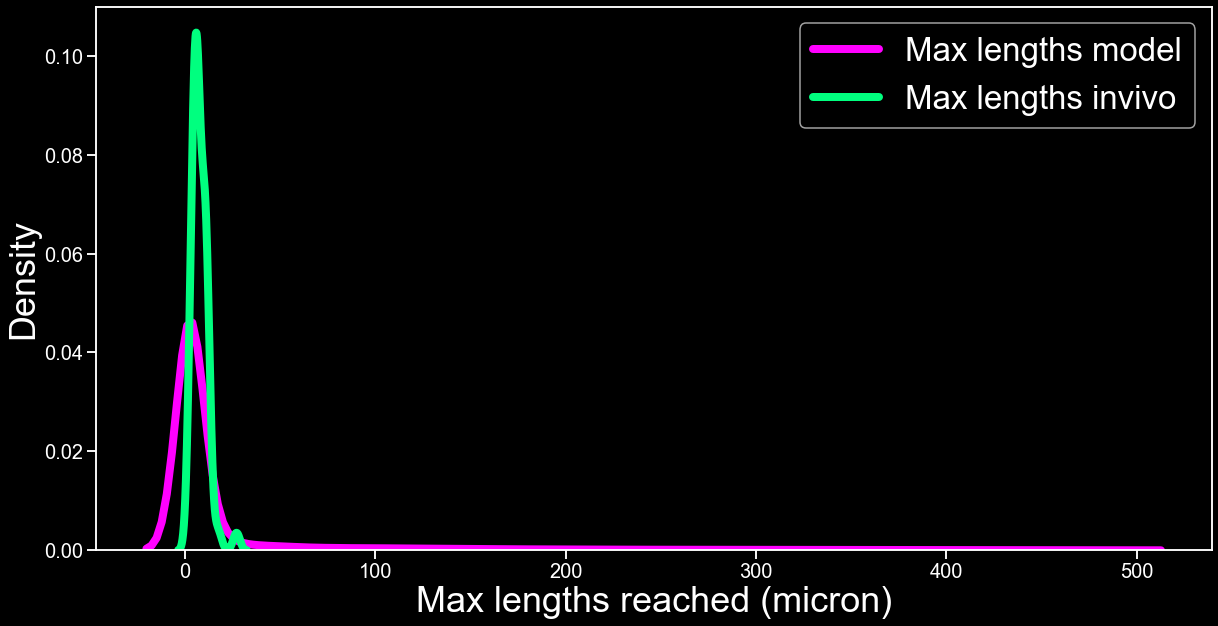

In [89]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(maxLenArr, 
            color='magenta', 
            shade=False, 
            label='Max lengths model',
            linewidth=8)
extPlot = sns.kdeplot(maxLensIV, 
            color='SpringGreen', 
            shade=False, 
            label='Max lengths invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Max lengths reached (micron)")

Text(0.5, 0, 'Average Time During Extension (s)')

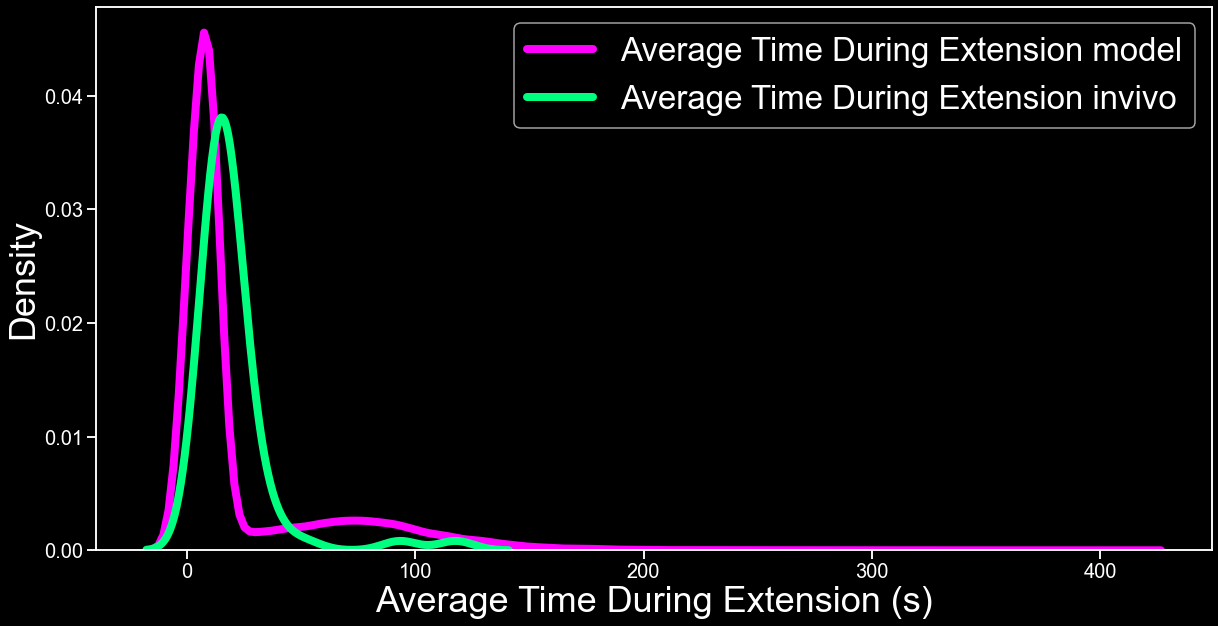

In [90]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(avgExtTimeArr, 
            color='magenta', 
            shade=False, 
            label='Average Time During Extension model',
            linewidth=8)
extPlot = sns.kdeplot(avgExtIV, 
            color='SpringGreen', 
            shade=False, 
            label='Average Time During Extension invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Average Time During Extension (s)")

Text(0.5, 0, 'Average Time During Retraction (s)')

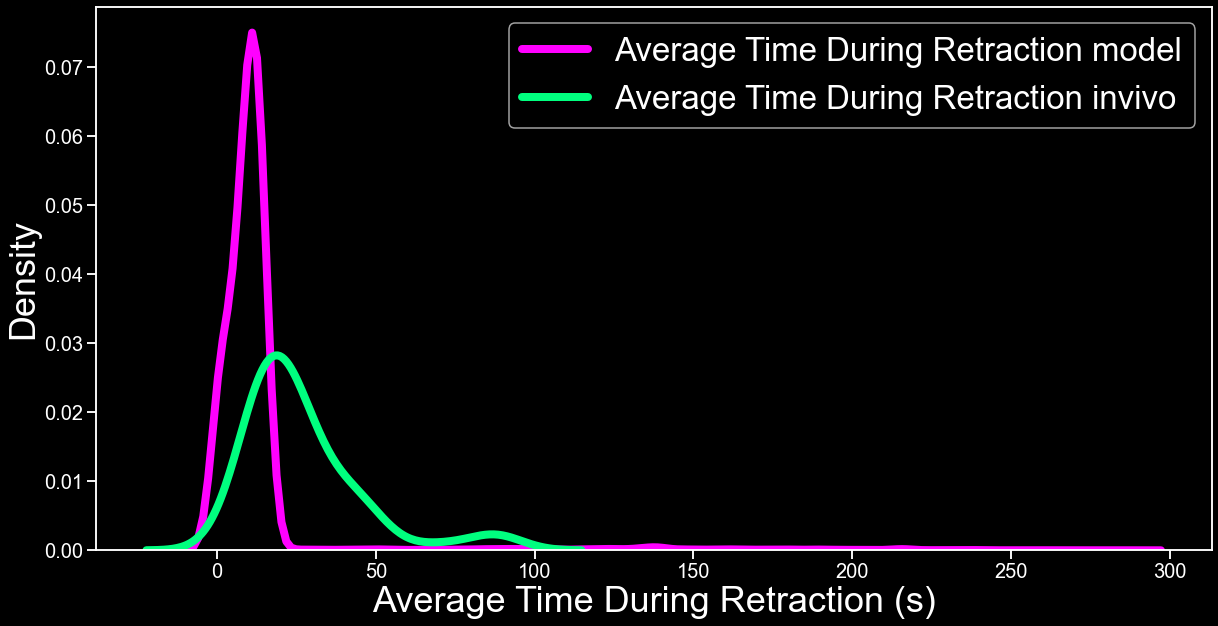

In [91]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(avgRetTimeArr, 
            color='magenta', 
            shade=False, 
            label='Average Time During Retraction model',
            linewidth=8)
extPlot = sns.kdeplot(avgRetIV, 
            color='SpringGreen', 
            shade=False, 
            label='Average Time During Retraction invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Average Time During Retraction (s)")

Text(0.5, 0, 'Time Spent at Max Length (s)')

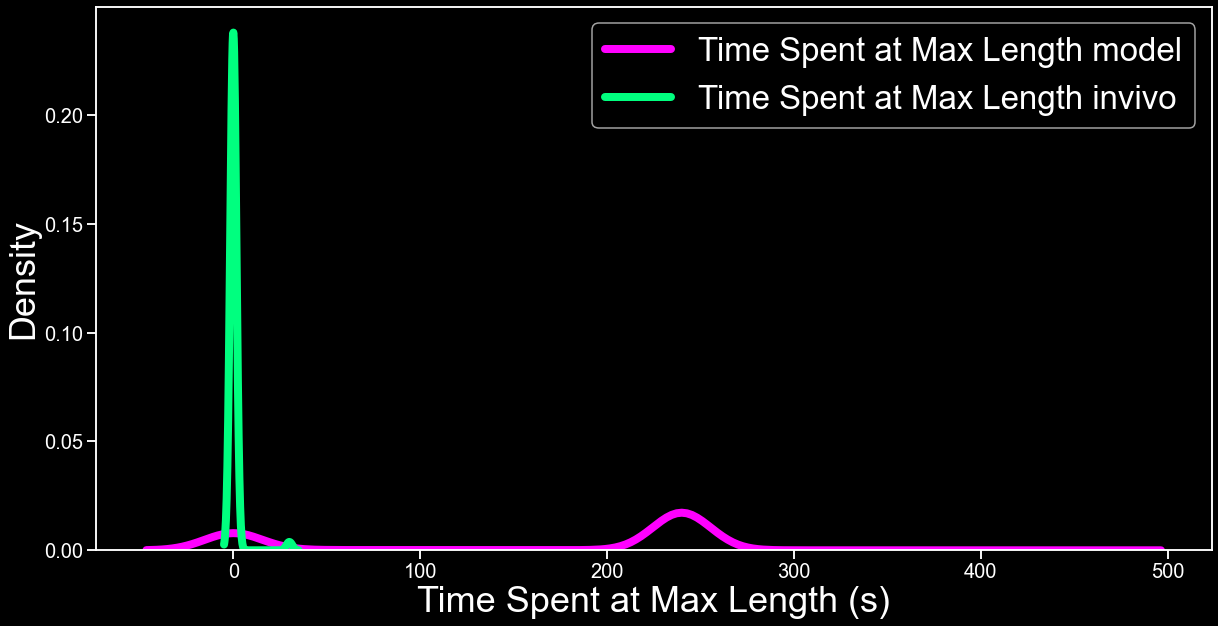

In [94]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(timeAtMaxArr, 
            color='magenta', 
            shade=False, 
            label='Time Spent at Max Length model',
            linewidth=8)
extPlot = sns.kdeplot(timeAtMaxIV, 
            color='SpringGreen', 
            shade=False, 
            label='Time Spent at Max Length invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Time Spent at Max Length (s)")

Text(0.5, 0, 'Time taken per micron extended (s)')

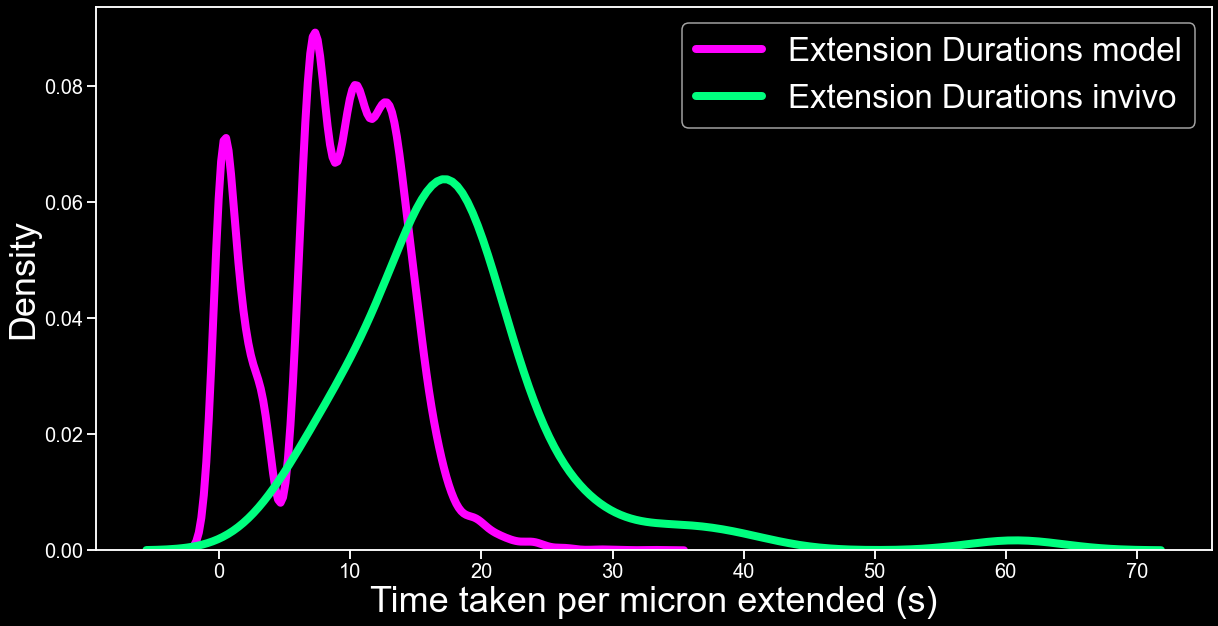

In [95]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(extArr, 
            color='magenta', 
            shade=False, 
            label='Extension Durations model',
            linewidth=8)
extPlot = sns.kdeplot(extTimesIV, 
            color='SpringGreen', 
            shade=False, 
            label='Extension Durations invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Time taken per micron extended (s)")

Text(0.5, 0, 'Time taken per micron retracted (s)')

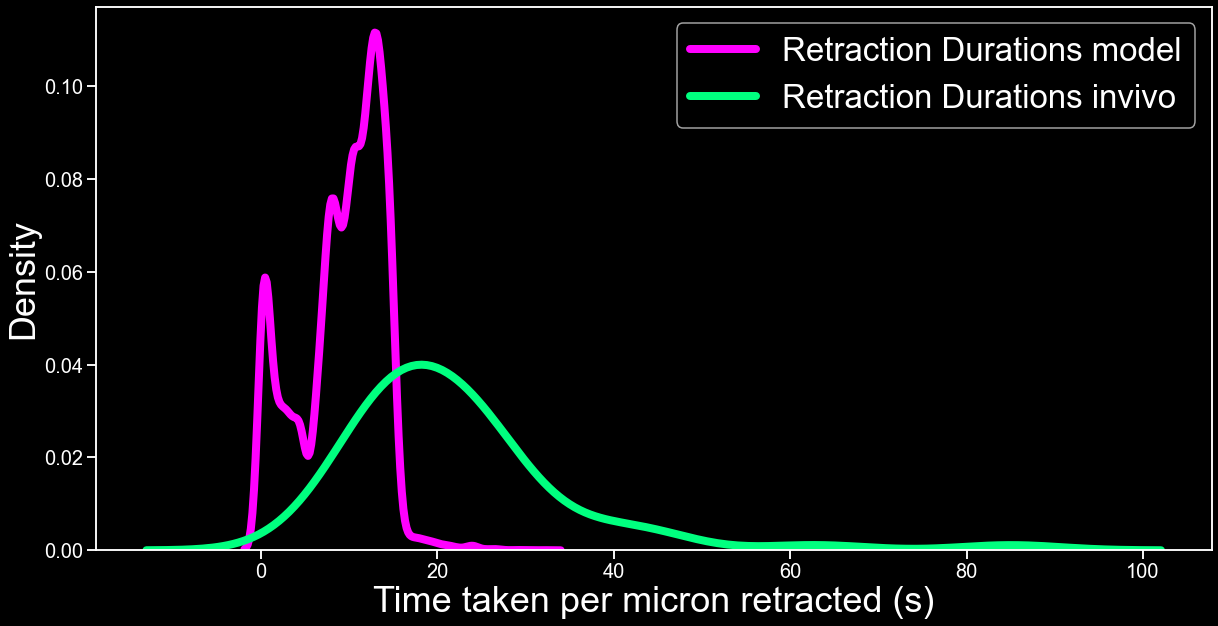

In [96]:
retPlot = plt.subplots(figsize=(20, 10))
retPlot = sns.kdeplot(retArr, 
            color='magenta', 
            shade=False, 
            label='Retraction Durations model',
            linewidth=8)
retPlot = sns.kdeplot(retTimesIV, 
            color='SpringGreen', 
            shade=False, 
            label='Retraction Durations invivo',
            linewidth=8)
retPlot.legend()
plt.xlabel("Time taken per micron retracted (s)")